In [1]:
from rsplib import RSPEngine, RSPPublisher, Stream, rdf_table,load_graph, accessURL

In [2]:
jasper = RSPEngine("http://jasper:8181/jasper")

In [3]:
qid  = 'yellow'
tbox = 'https://raw.githubusercontent.com/riccardotommasini/colorwave/master/colors.owl'
body = '''
    CONSTRUCT { 
           ?y a <http://www.streamreasoning.org/ontologies/2018/9/colors#Yellow>; 
               <http://www.streamreasoning.org/ontologies/2018/9/colors#from> ?r ; 
               <http://www.streamreasoning.org/ontologies/2018/9/colors#from> ?g .
    }
    FROM NAMED WINDOW <cw> ON <http://streamhub:9292/streamhub/streams/colorstream> [RANGE PT1S STEP PT1S]
    WHERE {
        { WINDOW <cw> { ?r a <http://www.streamreasoning.org/ontologies/2018/9/colors#Red>. } }
            UNION
        { WINDOW <cw> { ?g a <http://www.streamreasoning.org/ontologies/2018/9/colors#Green> .} }

        BIND( UUID() as ?y )
    }
    '''

In [4]:
yellowq = jasper.create(qid, body, tbox)

In [5]:
yellowq

http://jasper:8181/jasper/queries/yellow

In [6]:
jasper.streams()

[http://streamhub:9292/streamhub/streams/colorstream,
 http://jasper:8181/jasper/streams/yellow]

In [7]:
yellow_stream = yellowq.stream()

In [8]:
#the stream has not endpoint

In [9]:
yellow_stream.endpoints()

[]

In [10]:
# we need to expose it

In [11]:
r = jasper.expose(qid, 'WEBSOCKET', retention = 5)

In [12]:
yellowq.stream().endpoints()

[GET ws://jasper:8182/jasper/streams/yellow/observers/1738819950]

In [13]:
endpoint = r.endpoints()[0]

In [14]:
resp = endpoint.call()


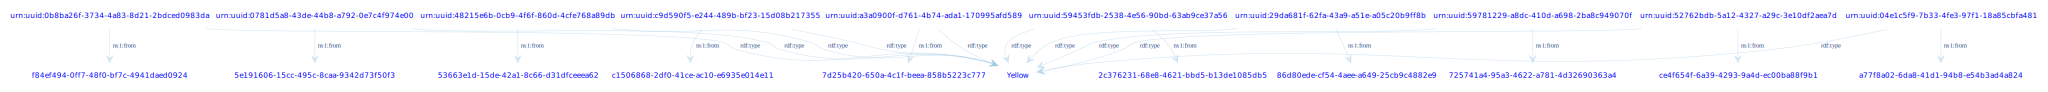

In [15]:
from rsplib.drawgraph import draw_graph
from IPython.display import display_html, Javascript, SVG, Image, display_svg,display_png

data, metadata = draw_graph(resp.g, 'svg')
display_svg(data['image/svg+xml'], raw=True)

In [16]:
resp

{
    "@graph": [
        {
            "@id": "urn:uuid:04e1c5f9-7b33-4fe3-97f1-18a85cbfa481",
            "@type": "http://www.streamreasoning.org/ontologies/2018/9/colors#Yellow",
            "from": "http://jasper:8181/a77f8a02-6da8-41d1-94b8-e54b3ad4a824"
        },
        {
            "@id": "urn:uuid:0781d5a8-43de-44b8-a792-0e7c4f974e00",
            "@type": "http://www.streamreasoning.org/ontologies/2018/9/colors#Yellow",
            "from": "http://jasper:8181/5e191606-15cc-495c-8caa-9342d73f50f3"
        },
        {
            "@id": "urn:uuid:0b8ba26f-3734-4a83-8d21-2bdced0983da",
            "@type": "http://www.streamreasoning.org/ontologies/2018/9/colors#Yellow",
            "from": "http://jasper:8181/f84ef494-0ff7-48f0-bf7c-4941daed0924"
        },
        {
            "@id": "urn:uuid:29da681f-62fa-43a9-a51e-a05c20b9ff8b",
            "@type": "http://www.streamreasoning.org/ontologies/2018/9/colors#Yellow",
            "from": "http://jasper:8181/86d80ede-cf54-4

In [17]:
jasper.delete(qid)

{
    "@id": "queries/yellow",
    "@type": "vprov:Task",
    "prov:generated": {
        "@id": "streams/yellow"
    },
    "prov:uses": {
        "@id": "http://streamhub:9292/streamhub/streams/colorstream"
    },
    "@context": {
        "@base": "http://jasper:8181/jasper/",
        "rdf": "http://www.w3.org/1999/02/22-rdf-syntax-ns#",
        "vsd": "http://w3id.org/rsp/vocals-sd#",
        "vocals": "http://w3id.org/rsp/vocals#",
        "xsd": "http://www.w3.org/2001/XMLSchema#",
        "format": "http://www.w3.org/ns/formats/",
        "rdfs": "http://www.w3.org/2000/01/rdf-schema#",
        "vprov": "http://w3id.org/rsp/vocals-prov#",
        "dcat": "http://www.w3.org/ns/dcat#",
        "prov": "http://www.w3.org/ns/prov#"
    }
}